In [ ]:
!pip install pyaudio
!pip install ttsx3
!pip install SpeechRecognition
!pip install pyttsx3
!sudo apt-get update
!sudo apt-get install espeak
!sudo apt-get install portaudio19-dev python3-pyaudio

ERROR: Could not find a version that satisfies the requirement ttsx3 (from versions: none)
ERROR: No matching distribution found for ttsx3
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,343 kB]
Get:12 http://archi

In [ ]:
import speech_recognition as sr
import pyttsx3
import datetime


def speak(text):
    engine = pyttsx3.init()
    engine.say(text)
    engine.runAndWait()

def get_audio():
    recognizer = sr.Recognizer()
    with sr.Microphone() as source:
        print("Listening...")
        audio = recognizer.listen(source)
        command = ""
        try:
            command = recognizer.recognize_google(audio)
            print("You said: "+command)
        except sr.UnknownValueError:
            print("Could not understand audio.")
        except sr.RequestError as e:
            print("Google Speech Recognition request failed: (0)".format(e))
        return command.lower()

def greet():
    current_time = datetime.datetime.now()
    hour = current_time.hour
    minute=current_time.minute
    second=current_time.second
    if 0 <= hour < 12:
        speak("Good morning!")
    elif hour < 18:
        speak("Good afternoon!")
    else:
        speak("Good evening!")

def ai_assistant():
    greet()
    speak("I am your AI assistent. How can I help you today?")

    while True:
        command = get_audio()

        if "stop" in command:
            speak("Goodbye!")
            break
        elif "date" in command:
            current_date = datetime.datetime.now().strftime("%Y-%m-%d")
            speak(f"The current date is {current_date}")
        elif "time" in command:
            current_time = datetime.datetime.now().strftime("%H:%M:%S")
            speak(f"The curren time is {current_time}")
        else:
            speak("I don't understand that command. Please try again.")

if __name__ == "_main_":
    ai_assistant()

In [ ]:
import random

responses = {
    "hello": ["Hi there.", "Hello.", "Hey."],
    "how are you?": ["I'm good. Thanks.", "Feeling great.", "I'm doing well."],
    "what's your name?": ["I'm just a simple bot. You can call me chatbot."],
    "bye": ["Goodbye.", "See you later.", "Bye. Take care."]
}

def getResponseMessage(message):
    message = message.lower()
    if message in responses:
        return random.choice(responses[message])
    else:
        return "I am not sure how to respond to that."

def main():
    print("Welcome to Chatbot")
    print("Type 'bye' to exit.")

    while True:
        user_input = input("You: ")

        if user_input.lower() == "bye":
            print("Chatbot: Goodbye")
            break

        response = getResponseMessage(user_input)
        print("Chatbot:", response)

if __name__ == "__main__":
    main()


Welcome to Chatbot
Type 'bye' to exit.
You: Hi
Chatbot: I am not sure how to respond to that.
You: hello
Chatbot: Hello.
You: how u doin
Chatbot: I am not sure how to respond to that.
You: bye
Chatbot: Goodbye


In [ ]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

# Specify the path to your CSV file in Google Drive
file_path = '/content/drive/My Drive/fai workshop/houseprice/train.csv'

# Read CSV file into a DataFrame
data = pd.read_csv(file_path)

# Print the columns
print("Columns in the CSV file:")
print(data.columns)


Columns in the CSV file:
Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET(PRICE_IN_LACS)'],
      dtype='object')


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Extract house sizes and prices from the dataframe
house_sizes = data[['SQUARE_FT']]  # Assuming the column name in CSV is 'house_size'
prices = data['TARGET(PRICE_IN_LACS)']               # Assuming the column name in CSV is 'price'

# Reshape data to match sklearn input requirements (if needed)
#house_sizes = house_sizes.values.reshape(-1, 1)
prices = prices.values

# Create linear regression object
model = LinearRegression()

# Fit the model to the data
model.fit(house_sizes, prices)

# Predict price for a 4000 sq. ft. house
house_size_4000 = [[4000]]
predicted_price = model.predict(house_size_4000)

print("Predicted price for a 4000 sq. ft. house:", predicted_price[0])


Predicted price for a 4000 sq. ft. house: 140.7003306817552


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
filep = '/content/drive/My Drive/fai workshop/houseprice/test.csv'
# Load the test data from the CSV file
test_data = pd.read_csv(filep)

# Extract the features (e.g., house size) from the test data
house_sizes = test_data[['SQUARE_FT']]

predicted_prices = model.predict(house_sizes)

# Print the predicted prices
print(predicted_prices)


[140.21969118 140.25514322 140.31873498 ... 144.78531421 140.30713401
 140.48323681]


In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.855


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load a toy dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Selecting only the first two features for visualization
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Predict labels for test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8333333333333334


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from io import StringIO

# Create synthetic data
data = {
    'Age': [25, 30, 35, 40, 45, 50, 55, 60, 65, 70],
    'Income': [50000, 60000, 75000, 80000, 100000, 120000, 150000, 180000, 200000, 250000],
    'Purchased': [0, 0, 0, 1, 1, 0, 1, 1, 1, 1]
}
df = pd.DataFrame(data)

# Split the dataset into features (X) and target variable (y)
X = df[['Age', 'Income']]
y = df['Purchased']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import pandas as pd

raw_data = {
    'Name': ['John', 'Anna', 'Peter', 'Linda', 'Bob'],
    'Age': [25, 30, None, 35, 40],  # removed unnecessary quote after square bracket
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male'],
    'City': ['New York', 'Paris', 'London', 'Berlin', ''],  # removed unnecessary quote after square bracket
    'Salary': [50000, 60000, 70000, None, 80000]
}

df = pd.DataFrame(raw_data)  # removed unnecessary pipe character

# Data cleaning
# Handling missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['City'].replace('', 'Unknown', inplace=True)  # corrected the syntax to replace empty strings with 'Unknown'

# Filling missing Salary values with 0
df['Salary'].fillna(0, inplace=True)

# Removing rows with Salary <= 0
df = df[df['Salary'] > 0]

# Convert data types if necessary
df['Age'] = df['Age'].astype(int)  # Converting Age to integer type

print("Cleaned Data:")
print(df)


Cleaned Data:
    Name  Age  Gender      City   Salary
0   John   25    Male  New York  50000.0
1   Anna   30  Female     Paris  60000.0
2  Peter   32    Male    London  70000.0
4    Bob   40    Male   Unknown  80000.0


In [ ]:
import pandas as pd
import joblib

def collect_inference_data():  # corrected function name by adding underscore between "collect" and "inference"
    data = []
    while True:
        food = input("Enter a food item (or 'done' to stop): ")
        if food.lower() == "done":
            break
        else:
            data.append(food)
    return data

# Load the trained model
model = joblib.load('E:/edulateral/sra/SRM_NN_ML/codes/food_preference_')  # incomplete file path

# Collect data from user for inference
print("Please enter new food items for preference prediction:")
user_data = collect_inference_data()

# Load the encoder used during training
encoder = joblib.load('E:/edulateral/srm/SRM_NN_ML/codes/food_encoder.pkl')

# Transform user input using the same encoder
X = encoder.transform([[food] for food in user_data])

# Perform inference
predictions = model.predict(X)

# Print the predictions
for food, prediction in zip(user_data, predictions):
    print(f"You may {'like' if prediction == 'yes' else 'dislike'} {food}.")


FileNotFoundError: [Errno 2] No such file or directory: 'E:/edulateral/sra/SRM_NN_ML/codes/food_preference_'

Accuracy: 0.83


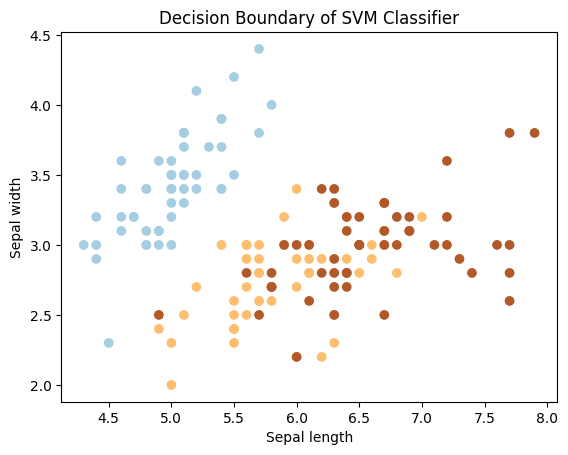

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load a toy dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Selecting only the first two features for visualization
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Visualize the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Decision Boundary of SVM Classifier')
plt.show()


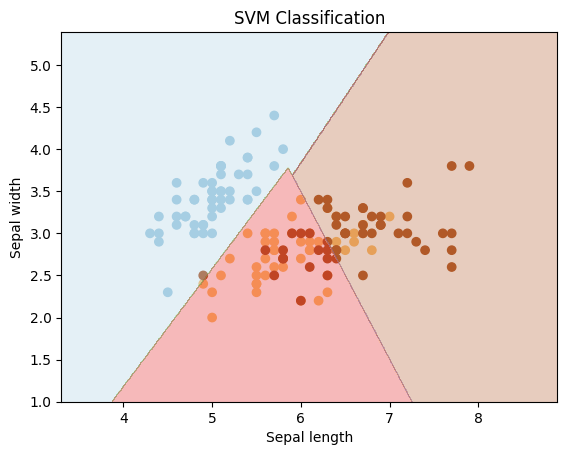

In [ ]:
# Visualize the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM Classification')

# Create grid to evaluate model
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Make predictions on the grid
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR  # corrected the import statement
from sklearn.metrics import mean_squared_error

# Generate some random data for regression
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=42)  # corrected the parameter names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # corrected the syntax for test_size

# Create an SVR regressor
svm_regressor = SVR(kernel='linear', C=1.0)  # corrected the variable name

# Fit the regressor to the training data
svm_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_regressor.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 670.82
